In [188]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords

In [189]:
#Reading Dataset.
spam_ds = pd.read_csv("emails_spam.csv")

In [190]:
emails_spam_df = spam_ds

In [191]:
# Display first five data from the dataset.
emails_spam_df.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In Dataset Label 1 : Spam and 0: Ham

In [192]:
emails_spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [193]:
# Renaming Unnamed column to ID Column.
emails_spam_df.rename(columns={"Unnamed: 0": "ID"}, inplace=True)

In [194]:
# Dataset information after updating column name.
emails_spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      6046 non-null   int64 
 1   Body    6045 non-null   object
 2   Label   6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [195]:
# Checking for the null value.
emails_spam_df.isnull().sum()

ID       0
Body     1
Label    0
dtype: int64

In [196]:
#Droping Null values from the dataset.
emails_spam_df = emails_spam_df.dropna()

In [197]:
# Checking for the null value after droping null values.
emails_spam_df.isnull().sum()

ID       0
Body     0
Label    0
dtype: int64

In [198]:
# Checking for the duplicate Values.
emails_spam_df.duplicated().sum()

0

In [199]:
# Checking (row, column) count.
emails_spam_df.shape

(6045, 3)

In [200]:
values = emails_spam_df['Label'].value_counts()
total = values.sum()

percentage_Ham = (values[0] /total) * 100
percentage_Spam = (values[1]/ total) *100


In [201]:
print('percentage of (Ham) 0 :' ,percentage_Ham)
print('percentage of (Spam) 1 :' ,percentage_Spam)

percentage of (Ham) 0 : 68.65177832919768
percentage of (Spam) 1 : 31.348221670802317


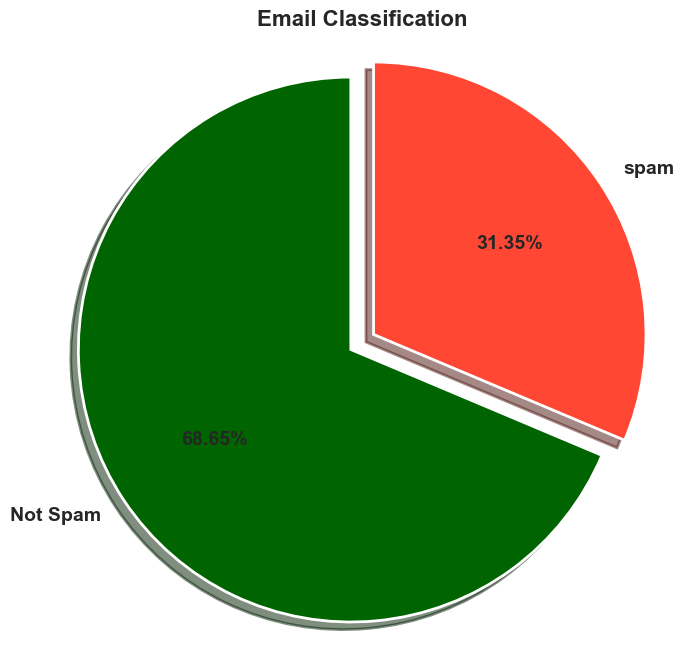

In [202]:

# Sample data
values = [percentage_Ham, percentage_Spam]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['#006400', '#FF4733']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['Not Spam', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set_size(14)
    text.set_weight('bold')
    autotext.set_size(14)
    autotext.set_weight('bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

In [203]:
# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krupeshshah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/krupeshshah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [204]:
emails_spam_df['num_characters'] = emails_spam_df['Body'].apply(len)
emails_spam_df['num_words'] = emails_spam_df['Body'].apply(lambda x: len(nltk.word_tokenize(x)))
emails_spam_df['num_sentence'] = emails_spam_df['Body'].apply(lambda x: len(nltk.sent_tokenize(x)))

/var/folders/bt/68ckdrx50rncht7gqv2mpssm0000gn/T/ipykernel_5327/3318771288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails_spam_df['num_characters'] = emails_spam_df['Body'].apply(len)
/var/folders/bt/68ckdrx50rncht7gqv2mpssm0000gn/T/ipykernel_5327/3318771288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails_spam_df['num_words'] = emails_spam_df['Body'].apply(lambda x: len(nltk.word_tokenize(x)))
/var/folders/bt/68ckdrx50rncht7gqv2mpssm0000gn/T/ipykernel_5327/3318771288.py:3: SettingWith

In [205]:
print("\n \nEntire Dataset Summary: \n")
print(emails_spam_df[['num_characters', 'num_words', 'num_sentence']].describe())
print("\n \n Ham Dataset Summary: \n")
print(emails_spam_df[emails_spam_df['Label'] == 0][['num_characters', 'num_words', 'num_sentence']].describe())
print("\n \n Spam Dataset Summary: \n")
print(emails_spam_df[emails_spam_df['Label'] == 1][['num_characters', 'num_words', 'num_sentence']].describe())


 
Entire Dataset Summary: 

       num_characters     num_words  num_sentence
count     6045.000000   6045.000000   6045.000000
mean      1758.272787    328.694458     11.714971
std       4940.284032    766.218921     26.649811
min          1.000000      0.000000      0.000000
25%        439.000000     82.000000      3.000000
50%        899.000000    172.000000      6.000000
75%       1624.000000    317.000000     11.000000
max     194978.000000  18564.000000    808.000000

 
 Ham Dataset Summary: 

       num_characters    num_words  num_sentence
count     4150.000000   4150.00000   4150.000000
mean      1699.373253    322.90000     10.936627
std       4898.320247    757.92311     25.428544
min          5.000000      1.00000      1.000000
25%        450.250000     85.00000      3.000000
50%        896.000000    176.00000      6.000000
75%       1594.750000    318.00000     11.000000
max     194978.000000  18564.00000    808.000000

 
 Spam Dataset Summary: 

       num_characters    

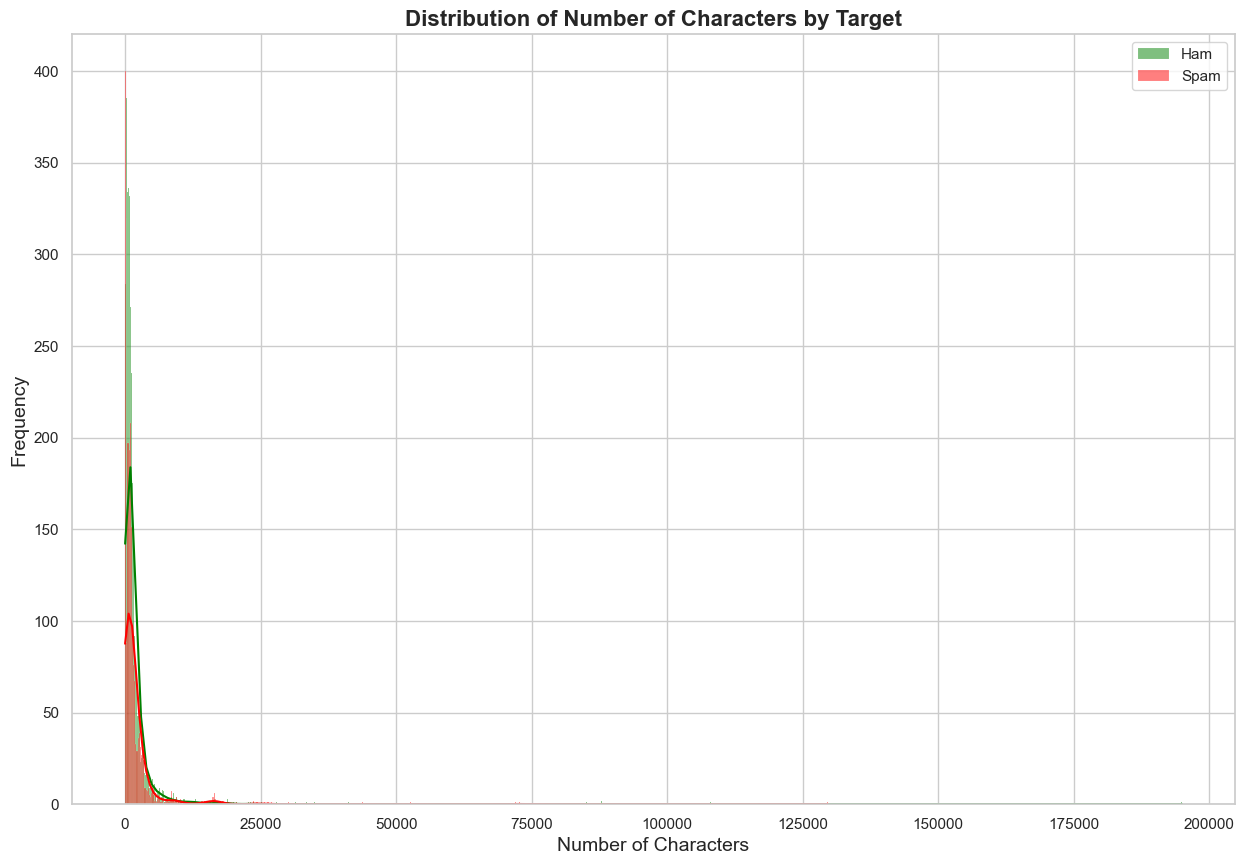

In [206]:
# Character Length Distribution for Legitimate and Spam Messages

# Create a figure and set the figure size
plt.figure(figsize=(15, 10))

# Plot the histogram for target 0 in blue
sns.histplot(emails_spam_df[emails_spam_df['Label'] == 0]['num_characters'], color='green', label='Ham', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(emails_spam_df[emails_spam_df['Label'] == 1]['num_characters'], color='red', label='Spam', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

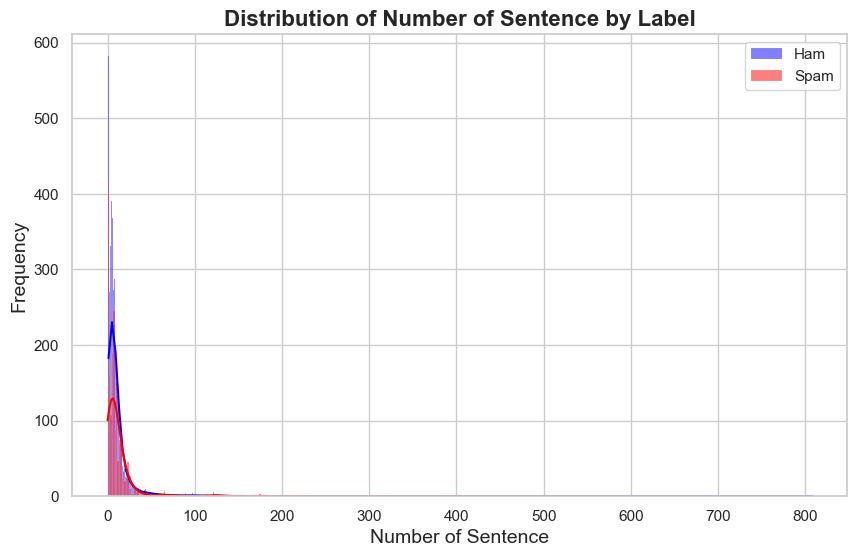

In [207]:

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(emails_spam_df[emails_spam_df['Label'] == 0]['num_sentence'], color='blue', label='Ham', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(emails_spam_df[emails_spam_df['Label'] == 1]['num_sentence'], color='red', label='Spam', kde=True)

# Add labels and a title
plt.xlabel('Number of Sentence', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Sentence by Label', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

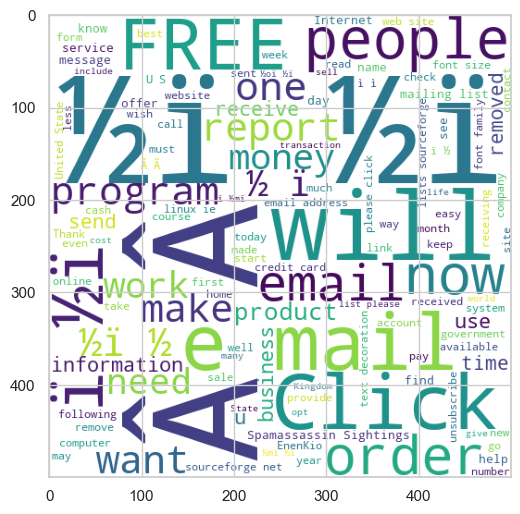

In [208]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(emails_spam_df[emails_spam_df['Label'] == 1]['Body'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

In [209]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

Summary of the function Operation: 
Lowercasing: Convert the entire text to lowercase to ensure consistent processing.

Tokenization: Break the text into individual words or tokens using NLTK's word_tokenize function.

Removing Special Characters: Iterate through the tokens, keeping only alphanumeric characters and discarding the rest.

Removing Stopwords and Punctuation: Iterate through the tokens again, removing common English stopwords and punctuation using NLTK's stopwords module and the string.punctuation from the string module.

Stemming: Apply stemming to the remaining tokens using the Porter Stemmer.

Joining Tokens: Join the processed tokens back into a single string.

In [210]:
emails_spam_df['transformed_text'] = emails_spam_df['Body'].apply(transform_text)

/var/folders/bt/68ckdrx50rncht7gqv2mpssm0000gn/T/ipykernel_5327/2816992504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails_spam_df['transformed_text'] = emails_spam_df['Body'].apply(transform_text)


In [211]:
emails_spam_df.head()

,ID,Body,Label,num_characters,num_words,num_sentence,transformed_text
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12,save 70 life insur spend life quot save ensur ...
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5,1 fight risk cancer http slim guarante lose lb...
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4,1 fight risk cancer http slim guarante lose lb...
3,3,##############################################...,1,2863,690,35,adult club offer free membership instant acces...
4,4,I thought you might like these:\n1) Slim Down ...,1,641,108,4,thought might like 1 slim guarante lose lb 30 ...


# Wordcloud for the spam emails

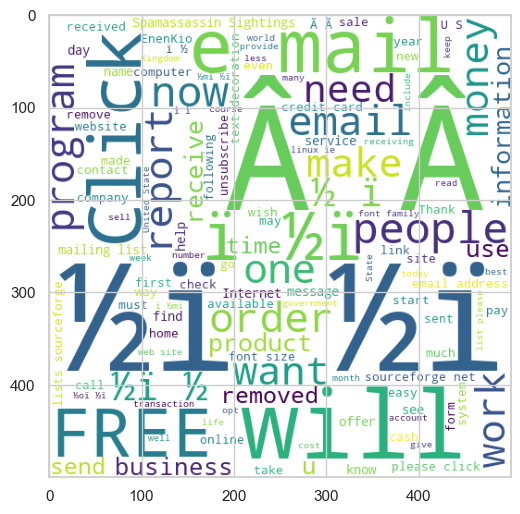

In [212]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(emails_spam_df[emails_spam_df['Label'] == 1]['Body'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

# Wordcloud for the Non Spam Email

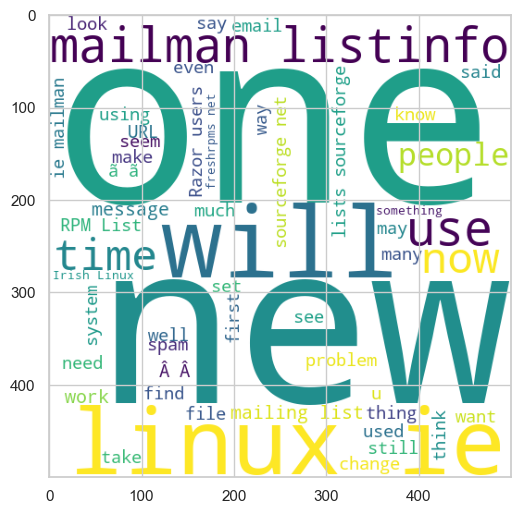

In [213]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(emails_spam_df[emails_spam_df['Label'] == 0]['Body'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

# Top 30 word for the Spam

In [214]:
def top_30_wrods(spam_df):
    spam_carpos = []
    for sentence in spam_df['transformed_text'].tolist():
        for word in sentence.split():
            spam_carpos.append(word)

    filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

    sns.barplot(data = filter_df, hue =filter_df[0], x = filter_df[0], y = filter_df[1], palette = 'bright', legend=False)
    plt.xticks(rotation = 90)
    plt.show()

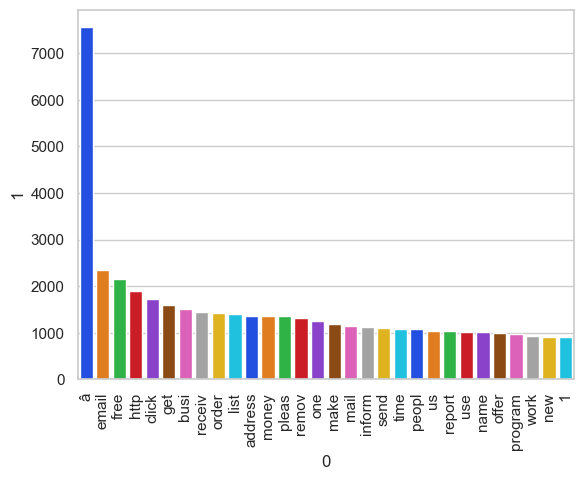

In [215]:
top_30_wrods(emails_spam_df[emails_spam_df['Label'] == 1])

# Find Top 30 Word For not spam

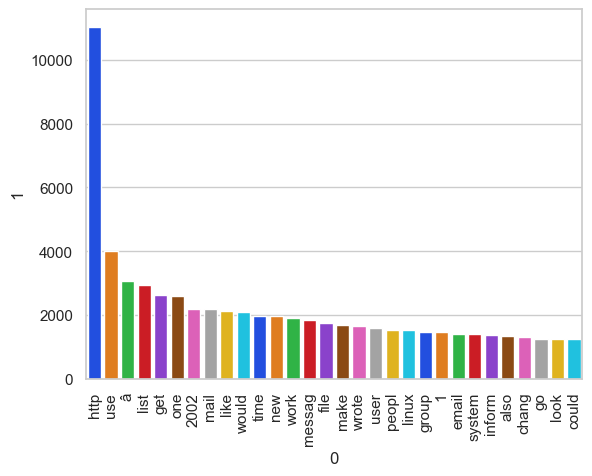

In [216]:
top_30_wrods(emails_spam_df[emails_spam_df['Label'] == 0])

# Machine Lerning Model

In [217]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score


# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## CountVectorizer:
### This method is used to convert a collection of text documents to a matrix of token counts.
### Each row in the matrix corresponds to a document, and each column corresponds to a unique word in the entire collection of documents.

## TfidfVectorizer:

### This method is similar to CountVectorizer but uses a different technique called Term Frequency-Inverse Document Frequency (TF-IDF).
### TF-IDF takes into account not only the frequency of a word in a document but also how unique or important that word is across all documents.


### The max_features parameter sets an upper limit on the number of features (words) to consider based on their TF-IDF scores.

In [218]:

cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [219]:
# Dependent and Independent Variable
X = tfid.fit_transform(emails_spam_df['transformed_text']).toarray()
y = emails_spam_df['Label'].values

In [220]:
# Split into Train and Test Data
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [221]:
# Initialize the models

# svc = SVC(kernel= "sigmoid", gamma  = 1.0)
# dtc = DecisionTreeClassifier(max_depth = 5)
# lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
# rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
# gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2) 

In [222]:

# def train_classifier(clfs, X_train, y_train, X_test, y_test):
#     clfs.fit(X_train,y_train)
#     y_pred = clfs.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     return accuracy , precision

In [223]:
# for the quick Comparison Creating list of Accuracy and precision score.
score_com = {}

## 1.Suport Vactor Classifier

In [224]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [225]:
print("SVC")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
score_com['SVC'] =[accuracy,precision]

SVC
Accuracy:  0.946236559139785
Precision:  0.8978622327790974


## 2.Decision Tree Classifier

In [226]:
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [227]:
print("SVC")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
score_com['DTC'] = [accuracy,precision]

SVC
Accuracy:  0.8751033912324235
Precision:  0.8429752066115702


## 3.Logistic Regression

In [228]:
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
lrc.fit(X_train,y_train)
y_pred = lrc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [229]:
print("LRC")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
score_com['LRC'] = [accuracy,precision]

LRC
Accuracy:  0.9338296112489661
Precision:  0.8864734299516909


## 4.RandomForestClassifier

In [230]:
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [231]:
print("RFC")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
score_com['RFC'] = [accuracy,precision]

RFC
Accuracy:  0.9445822994210091
Precision:  0.8954869358669834


## 5.Gradient Boosting Classifier

In [232]:
gbc = GradientBoostingClassifier(n_estimators = 50, random_state = 2) 
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [233]:
print("GBC")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
score_com['GBC'] = [accuracy,precision]

GBC
Accuracy:  0.9156327543424317
Precision:  0.8781725888324873


In [234]:
print(score_com)

{'SVC': [0.946236559139785, 0.8978622327790974], 'DTC': [0.8751033912324235, 0.8429752066115702], 'LRC': [0.9338296112489661, 0.8864734299516909], 'RFC': [0.9445822994210091, 0.8954869358669834], 'GBC': [0.9156327543424317, 0.8781725888324873]}


In [235]:
model_acc_prec = pd.DataFrame(score_com,index=['Accuracy', 'Precision'])

In [236]:
model_acc_prec

,SVC,DTC,LRC,RFC,GBC
Accuracy,0.946237,0.875103,0.933830,0.944582,0.915633
Precision,0.897862,0.842975,0.886473,0.895487,0.878173
